In [ ]:
#Importing all the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras import layers, models


In [ ]:
#loading the dataset
 (X_train, Y_train), (X_test, Y_test) =  keras.datasets.mnist.load_data()

In [ ]:
X_train.shape, X_test.shape, Y_test.shape,y_train.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

In [ ]:
print(X_train[0].shape)

(28, 28)


**Scaling and Normalization**

In [ ]:
print(X_train[11])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
# Normalize pixel values to [0,1]
X_train = X_train/255
X_test = X_test/255

In [ ]:
#setting up the layer of neural network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Complie the model


In [ ]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the neural network
history = model.fit(X_train,Y_train,
                    epochs = 10,
                    validation_split = 0.1,
                    batch_size = 64,
                    verbose = 2
)

Epoch 1/10
844/844 - 39s - 47ms/step - accuracy: 0.9266 - loss: 0.2372 - val_accuracy: 0.9842 - val_loss: 0.0521
Epoch 2/10
844/844 - 41s - 48ms/step - accuracy: 0.9759 - loss: 0.0779 - val_accuracy: 0.9870 - val_loss: 0.0421
Epoch 3/10
844/844 - 41s - 49ms/step - accuracy: 0.9807 - loss: 0.0618 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 4/10
844/844 - 41s - 48ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9908 - val_loss: 0.0350
Epoch 5/10
844/844 - 41s - 49ms/step - accuracy: 0.9870 - loss: 0.0425 - val_accuracy: 0.9895 - val_loss: 0.0366
Epoch 6/10
844/844 - 41s - 48ms/step - accuracy: 0.9878 - loss: 0.0367 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 7/10
844/844 - 41s - 48ms/step - accuracy: 0.9886 - loss: 0.0350 - val_accuracy: 0.9893 - val_loss: 0.0378
Epoch 8/10
844/844 - 41s - 49ms/step - accuracy: 0.9901 - loss: 0.0296 - val_accuracy: 0.9912 - val_loss: 0.0348
Epoch 9/10
844/844 - 38s - 45ms/step - accuracy: 0.9904 - loss: 0.0285 - val_accuracy: 0.9917 - 

Training data accuracy= 99.1%

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test, verbose=2)
print(f"test_accuracy:{test_accuracy:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9917 - loss: 0.0257
test_accuracy:0.9917


Test data accuracy = 99.1%

In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.1002939e-09 2.0060718e-07 8.6268145e-08 6.4901963e-07 1.0115725e-11
 1.9181019e-10 7.5709999e-15 9.9999887e-01 4.5259831e-08 3.3015681e-08]


In [ ]:
label_for_first_test_image =np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Building a Predictive system


In [ ]:
input_Image_path = '/content/number.png'
input_image = cv2.imread(input_Image_path)


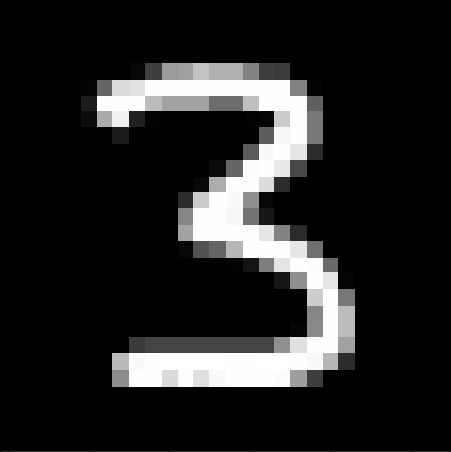

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(452, 451, 3)

In [ ]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
greyscale.shape

(452, 451)

In [ ]:
input_image_resize = cv2.resize(greyscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])


In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[1.86513557e-21 4.75908939e-12 1.94344134e-13 1.00000000e+00
  1.87123683e-20 3.72139255e-12 4.24948861e-18 8.77036291e-13
  2.47113718e-11 1.37189784e-14]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**Building the Predictive System**

Path of the image to be predicted:/content/number.png


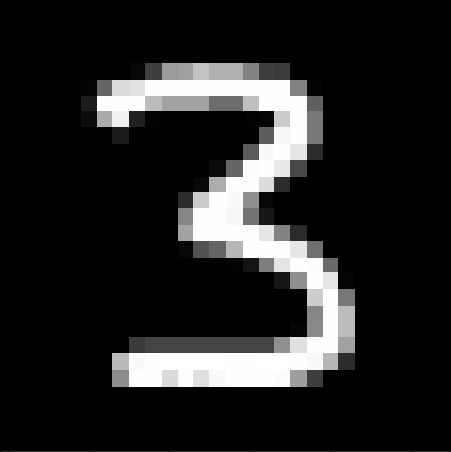

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The Handwritten Digit is recognised as:  3


In [ ]:
input_Image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_Image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(greyscale,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print("The Handwritten Digit is recognised as: ",input_pred_label)

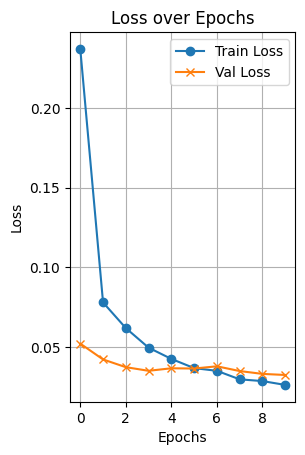

In [ ]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

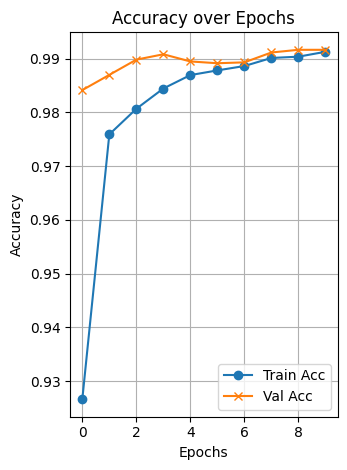

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

 Conclusion
In this project, I successfully implemented a Convolutional Neural Network (CNN) to recognize handwritten digits using the MNIST dataset. The model was trained on over 50,000 labeled examples and validated on unseen data, achieving high accuracy and generalization.